## Prediction using unsupervised ML
### K-Means Clustering
[Beginner Level]

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
#Reading Iris dataset
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The dataset have the labels provided for classes which we won't be using for prediction.    
But the labels can be used to visualize and compare our unsupervised prediction while working on dataset.

### Exploring dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

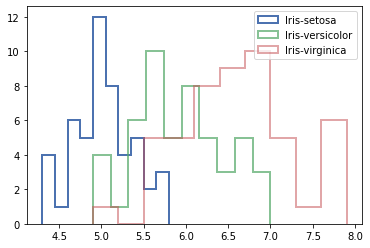

In [7]:
#Visualizing distribution of one attribute (septal length) across three labelled classes given
plt.style.use('seaborn-deep')
plt.hist(df[df['Species']=='Iris-setosa']['SepalLengthCm'], histtype='step', linewidth=2, alpha=1,label='Iris-setosa')
plt.hist(df[df['Species']=='Iris-versicolor']['SepalLengthCm'],histtype='step', linewidth=2,alpha=0.7,label='Iris-versicolor')
plt.hist(df[df['Species']=='Iris-virginica']['SepalLengthCm'],histtype='step', linewidth=2,alpha=0.5,label='Iris-virginica')
plt.legend()
plt.show()

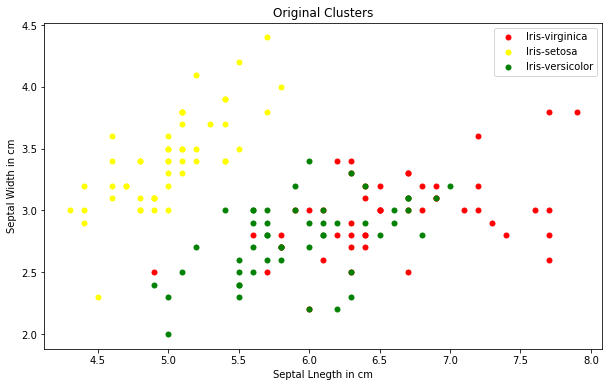

In [8]:
# Visualising the original clusters - On the first two columns
plt.figure(figsize=(10,6))
plt.scatter(df[df['Species']=='Iris-virginica']['SepalLengthCm'], df[df['Species']=='Iris-virginica']['SepalWidthCm'], 
            s = 25, c = 'red', label = 'Iris-virginica')
plt.scatter(df[df['Species']=='Iris-setosa']['SepalLengthCm'], df[df['Species']=='Iris-setosa']['SepalWidthCm'], 
            s = 25, c = 'yellow', label = 'Iris-setosa')
plt.scatter(df[df['Species']=='Iris-versicolor']['SepalLengthCm'], df[df['Species']=='Iris-versicolor']['SepalWidthCm'],
            s = 25, c = 'green', label = 'Iris-versicolor')

plt.xlabel('Septal Lnegth in cm')
plt.ylabel('Septal Width in cm')
plt.title('Original Clusters')

plt.legend(loc='upper right')

### KMeans Clustering:

### The elbow method is used to find optimum number of clusters 
To compare the clustering efficiency, within cluster sum of squares of data points is analysed.

In [9]:
# Defining input datapoints - Considering only attributes while ignoring the defined classes (species)
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [10]:
# Finding the optimum number of clusters by iterating over range of number of clusters
sse = []
for n_cluster in range(1,11):
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

Text(0.5, 1.0, 'The Elbow Method')

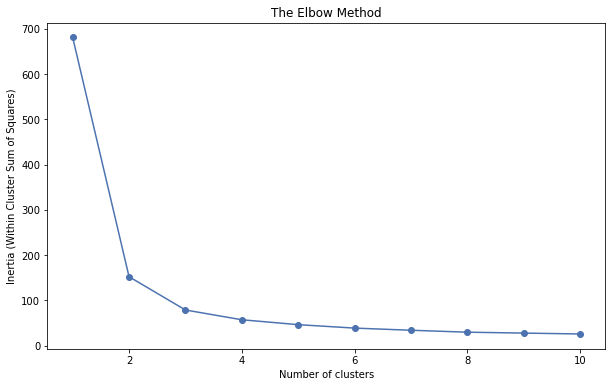

In [11]:
# Visualizing the metric function over range of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1,11),sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within Cluster Sum of Squares)')
plt.title('The Elbow Method')

#### At 3, the minima has reached and tends to reach plateu therafter. Therefore the final clustering is initialized with 3 clusters

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
pred = kmeans.predict(X)

In [13]:
df['Cluster']=pred

In [14]:
df['Cluster'].value_counts()

2    62
1    50
0    38
Name: Cluster, dtype: int64

In [15]:
df.groupby(['Species']).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
50,51,7.0,3.2,4.7,1.4,Iris-versicolor,2
51,52,6.4,3.2,4.5,1.5,Iris-versicolor,2
52,53,6.9,3.1,4.9,1.5,Iris-versicolor,0
53,54,5.5,2.3,4.0,1.3,Iris-versicolor,2
54,55,6.5,2.8,4.6,1.5,Iris-versicolor,2


### Visualizing the predicted clusters and the original clusters

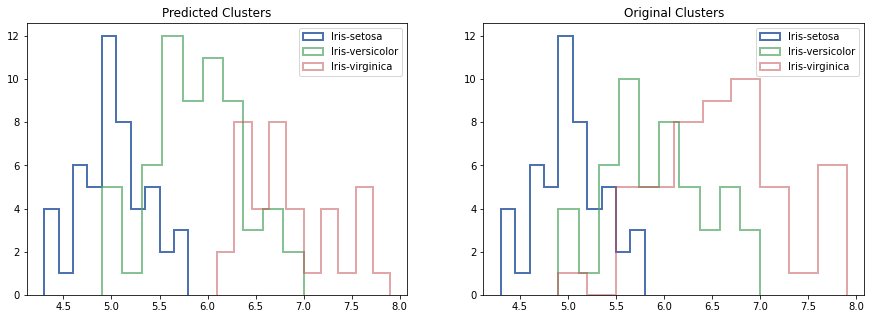

In [16]:
plt.style.use('seaborn-deep')

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.hist(df[df['Cluster']==1]['SepalLengthCm'], histtype='step', linewidth=2, alpha=1,label='Iris-setosa')
plt.hist(df[df['Cluster']==2]['SepalLengthCm'],histtype='step', linewidth=2,alpha=0.7,label='Iris-versicolor')
plt.hist(df[df['Cluster']==0]['SepalLengthCm'],histtype='step', linewidth=2,alpha=0.5,label='Iris-virginica')
plt.legend()
plt.title('Predicted Clusters')

plt.subplot(122)
plt.hist(df[df['Species']=='Iris-setosa']['SepalLengthCm'], histtype='step', linewidth=2, alpha=1,label='Iris-setosa')
plt.hist(df[df['Species']=='Iris-versicolor']['SepalLengthCm'],histtype='step', linewidth=2,alpha=0.7,label='Iris-versicolor')
plt.hist(df[df['Species']=='Iris-virginica']['SepalLengthCm'],histtype='step', linewidth=2,alpha=0.5,label='Iris-virginica')
plt.legend()
plt.title('Original Clusters')

plt.show()

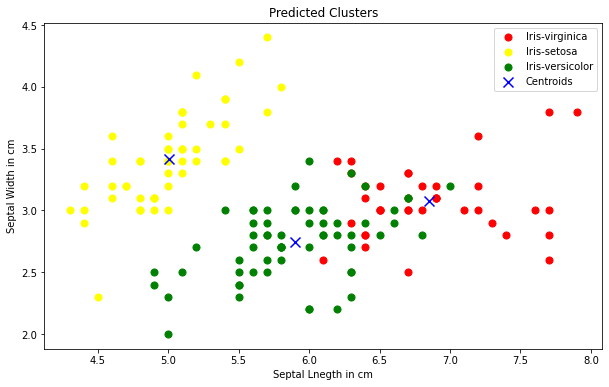

In [17]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,6))
plt.scatter(df[df['Cluster']==0]['SepalLengthCm'], df[df['Cluster']==0]['SepalWidthCm'], 
            s = 50, c = 'red', label = 'Iris-virginica')
plt.scatter(df[df['Cluster']==1]['SepalLengthCm'], df[df['Cluster']==1]['SepalWidthCm'], 
            s = 50, c = 'yellow', label = 'Iris-setosa')
plt.scatter(df[df['Cluster']==2]['SepalLengthCm'], df[df['Cluster']==2]['SepalWidthCm'],
            s = 50, c = 'green', label = 'Iris-versicolor')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'blue', marker='x',label = 'Centroids')

plt.xlabel('Septal Lnegth in cm')
plt.ylabel('Septal Width in cm')
plt.title('Predicted Clusters')

plt.legend(loc='upper right')